In [200]:
import tensorflow as tf

In [201]:
print(tf.__version__)

2.6.0


In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [203]:
df30 = pd.read_csv('C:/Users/Gustavo Chinchayan/Documents/Python/DLD/DS_Files/ChatLogs/chatriotgames/chatriotgames101821Average30Second.csv', index_col='Date')

In [204]:
df30

,comp_score
Date,
2021-10-18 17:18:00,0.147404
2021-10-18 17:18:30,0.056627
2021-10-18 17:19:00,0.008208
2021-10-18 17:19:30,0.033074
2021-10-18 17:20:00,0.022255
...,...
2021-10-18 18:13:30,0.002853
2021-10-18 18:14:00,-0.157733
2021-10-18 18:14:30,-0.137838


In [205]:
df30.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 2021-10-18 17:18:00 to 2021-10-18 18:15:30
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   comp_score  116 non-null    float64
dtypes: float64(1)
memory usage: 1.8+ KB


In [206]:
df30.index = pd.DatetimeIndex(df30.index)
df30.index = df30.index.time

In [207]:
df30

,comp_score
17:18:00,0.147404
17:18:30,0.056627
17:19:00,0.008208
17:19:30,0.033074
17:20:00,0.022255
...,...
18:13:30,0.002853
18:14:00,-0.157733
18:14:30,-0.137838
18:15:00,-0.093781


<AxesSubplot:xlabel='time'>

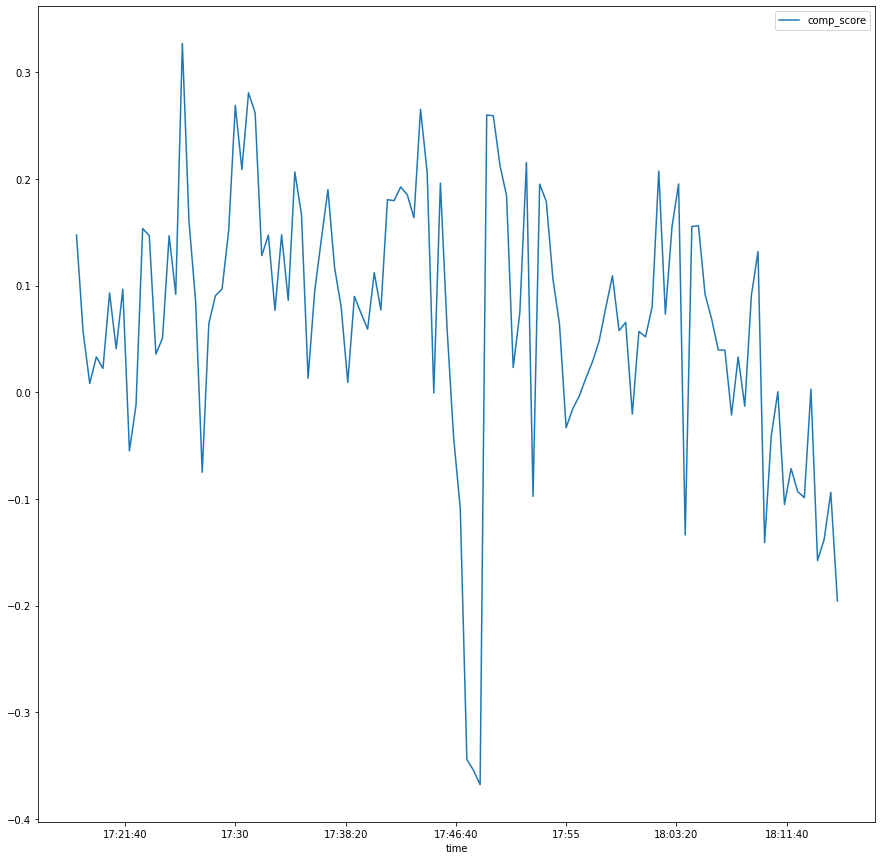

In [208]:
df30.plot(figsize=(15, 15))

In [209]:
df30.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 17:18:00 to 18:15:30
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   comp_score  116 non-null    float64
dtypes: float64(1)
memory usage: 1.8+ KB


In [210]:
len(df30)

116

In [211]:
test_size = 18

In [212]:
test_index = len(df30) - test_size

In [213]:
test_index

98

In [214]:
train = df30.iloc[:test_index]

In [215]:
len(train)

98

In [216]:
test = df30.iloc[test_index:]

In [217]:
len(test)

18

In [218]:
train.head()

,comp_score
17:18:00,0.147404
17:18:30,0.056627
17:19:00,0.008208
17:19:30,0.033074
17:20:00,0.022255


In [219]:
test.head()

,comp_score
18:07:00,0.039368
18:07:30,-0.021319
18:08:00,0.032901
18:08:30,-0.013170
18:09:00,0.090668


In [220]:
from sklearn.preprocessing import MinMaxScaler

In [221]:
scaler = MinMaxScaler()

In [222]:
scaler.fit(train)

MinMaxScaler()

In [223]:
scaled_train = scaler.transform(train)

In [224]:
scaled_test = scaler.transform(test)

In [225]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [226]:
length = 2 # This would be the length of our batches
# source of x points will come from scaled_train, and the source of the y points will come also from scaled_train

In [227]:
generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length = length, batch_size=1)

In [228]:
len(generator)

96

In [229]:
X, y = generator[0]

In [230]:
X

array([[[0.74170741],
        [0.61103326]]])

In [231]:
y

array([[0.5413343]])

In [232]:
X.shape

(1, 2, 1)

In [233]:
X[0]

array([[0.74170741],
       [0.61103326]])

In [234]:
from tensorflow.keras.models import Sequential

In [235]:
from tensorflow.keras.layers import LSTM, Dense

In [236]:
n_features = 1 

In [237]:
model = Sequential()
model.add(LSTM(100, activation='tanh', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [238]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [239]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

In [240]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [241]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                               length = length, batch_size=1)

In [242]:
model.fit_generator(generator, epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20


C:\Users\Gustavo Chinchayan\anaconda3\envs\python_practice\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


96/96 [==============================] - 2s 6ms/step - loss: 0.1043 - val_loss: 0.0237
Epoch 2/20
96/96 [==============================] - 0s 2ms/step - loss: 0.0279 - val_loss: 0.0327
Epoch 3/20
96/96 [==============================] - 0s 2ms/step - loss: 0.0278 - val_loss: 0.0224
Epoch 4/20
96/96 [==============================] - 0s 2ms/step - loss: 0.0269 - val_loss: 0.0327
Epoch 5/20
96/96 [==============================] - 0s 2ms/step - loss: 0.0267 - val_loss: 0.0298


In [243]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

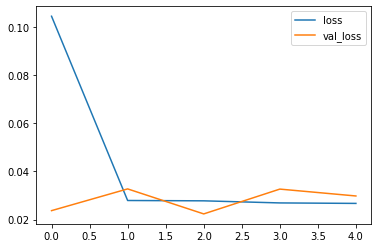

In [244]:
losses.plot()

In [245]:
test_predictions = []

In [246]:
scaled_train[-length:]

array([[0.62794403],
       [0.58657189]])

In [247]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # Get predictions one time stamp ahead 
    current_prediction = model.predict(current_batch)[0]
    
    # Store the prediction in the list
    test_predictions.append(current_prediction)
    
    # Update the batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:, :], [[current_prediction]], axis=1)

In [248]:
true_predictions = scaler.inverse_transform(test_predictions)

In [249]:
true_predictions[:10]

array([[0.08002225],
       [0.07888594],
       [0.09146518],
       [0.09359217],
       [0.09801038],
       [0.09956187],
       [0.10127455],
       [0.10210789],
       [0.10281805],
       [0.10322412]])

In [250]:
test['Predictions'] = true_predictions

C:\Users\GUSTAV~1\AppData\Local\Temp/ipykernel_18940/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [251]:
test

,comp_score,Predictions
18:07:00,0.039368,0.080022
18:07:30,-0.021319,0.078886
18:08:00,0.032901,0.091465
18:08:30,-0.013170,0.093592
18:09:00,0.090668,0.098010
18:09:30,0.131836,0.099562
18:10:00,-0.140962,0.101275
18:10:30,-0.041043,0.102108
18:11:00,0.000455,0.102818
18:11:30,-0.105241,0.103224


<AxesSubplot:xlabel='time'>

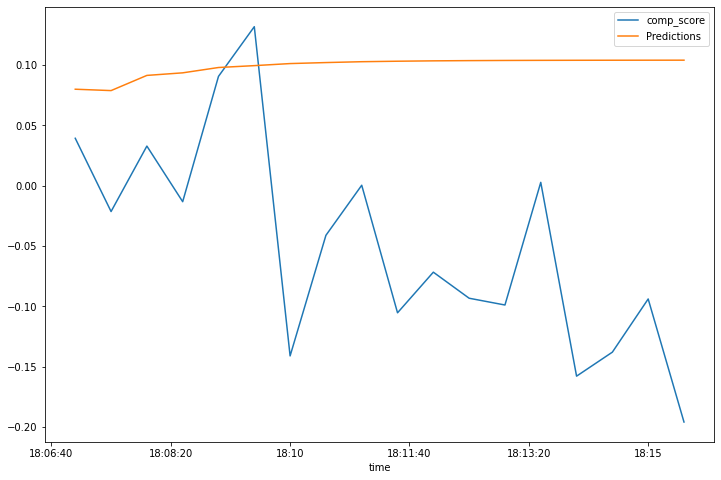

In [252]:
test.plot(figsize=(12, 8))

In [253]:
# Now we are ready to do forecasting using the full dataset

full_scaler = MinMaxScaler()

scaled_full_data = full_scaler.fit_transform(df30)

In [254]:
length = 2
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, 
                                length=length, batch_size= 1)

In [255]:
model2 = Sequential()
model2.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

model2.fit_generator(generator, epochs=8)

C:\Users\Gustavo Chinchayan\anaconda3\envs\python_practice\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
114/114 [==============================] - 1s 1ms/step - loss: 0.1729
Epoch 2/8
114/114 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 3/8
114/114 [==============================] - 0s 1ms/step - loss: 0.0263
Epoch 4/8
114/114 [==============================] - 0s 1ms/step - loss: 0.0248
Epoch 5/8
114/114 [==============================] - 0s 1ms/step - loss: 0.0258
Epoch 6/8
114/114 [==============================] - 0s 1ms/step - loss: 0.0264
Epoch 7/8
114/114 [==============================] - 0s 1ms/step - loss: 0.0259
Epoch 8/8
114/114 [==============================] - 0s 1ms/step - loss: 0.0255


In [256]:
forecast = []

periods = 2

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # Get predictions one time stamp ahead 
    current_prediction = model.predict(current_batch)[0]
    
    # Store the prediction in the list
    forecast.append(current_prediction)
    
    # Update the batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:, :], [[current_prediction]], axis=1)

In [257]:
forecast = scaler.inverse_transform(forecast)

In [258]:
forecast

array([[-0.01639052],
       [-0.01350802]])

In [259]:
forecast_index = pd.date_range("18:16:00", "18:16:30", freq="30s").strftime('%H:%M:%S')

In [260]:
forecast_index

Index(['18:16:00', '18:16:30'], dtype='object')

In [261]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

In [262]:
forecast_df

,Forecast
18:16:00,-0.016391
18:16:30,-0.013508


<AxesSubplot:>

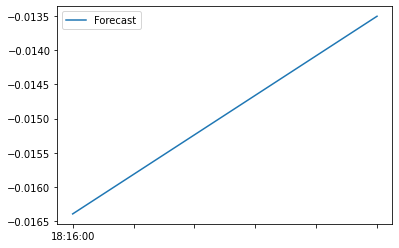

In [263]:
forecast_df.plot()

<AxesSubplot:xlabel='time'>

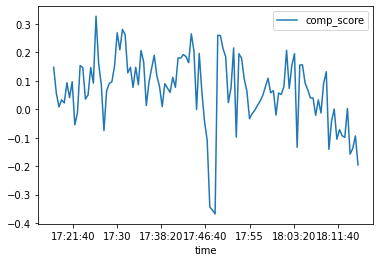

In [264]:
df30.plot()

In [265]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA

In [266]:
df30sec = pd.read_csv('C:/Users/Gustavo Chinchayan/Documents/Python/DLD/DS_Files/ChatLogs/chatriotgames/chatriotgames101821Average30Second.csv')

In [281]:
rng = pd.date_range('17:18:00', '18:15:30', freq='30s')

In [282]:
ts_vader = pd.Series(df30sec.comp_score.values, index=rng)

In [269]:
ts_vader

2021-11-27 17:18:00    0.147404
2021-11-27 17:18:30    0.056627
2021-11-27 17:19:00    0.008208
2021-11-27 17:19:30    0.033074
2021-11-27 17:20:00    0.022255
                         ...   
2021-11-27 18:13:30    0.002853
2021-11-27 18:14:00   -0.157733
2021-11-27 18:14:30   -0.137838
2021-11-27 18:15:00   -0.093781
2021-11-27 18:15:30   -0.195750
Freq: 30S, Length: 116, dtype: float64

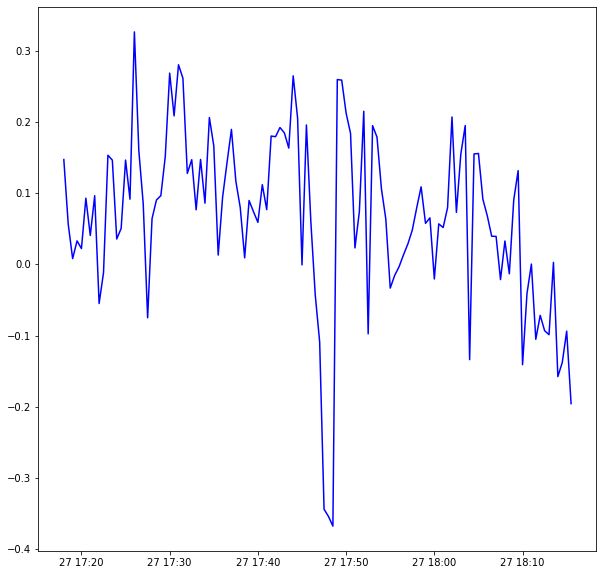

In [270]:
plt.figure(figsize=(10,10))
plt.plot(ts_vader, color = 'blue')
plt.show()

#Do Stationary test to prove the following: Must perform Dicker Fulley test to ensure it is stationary
#Mean (mu) needs to be constant
#SD. needs to be constant 
#and there is no seasonality

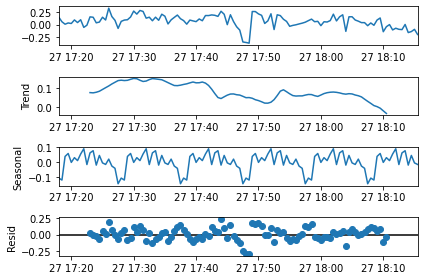

In [276]:
res = sm.tsa.seasonal_decompose(ts_vader, period=20)
resplot = res.plot()
plt.show()

In [272]:
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [283]:
test_stationarity(ts_vader) 
#P value less than .05 which means we reject Null hypothesis and state that the dataset is stationary 

Results of Dickey-Fuller Test:
Test Statistic                  -5.589710
p-value                          0.000001
#Lags Used                       0.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64


C:\Users\Gustavo Chinchayan\anaconda3\envs\python_practice\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


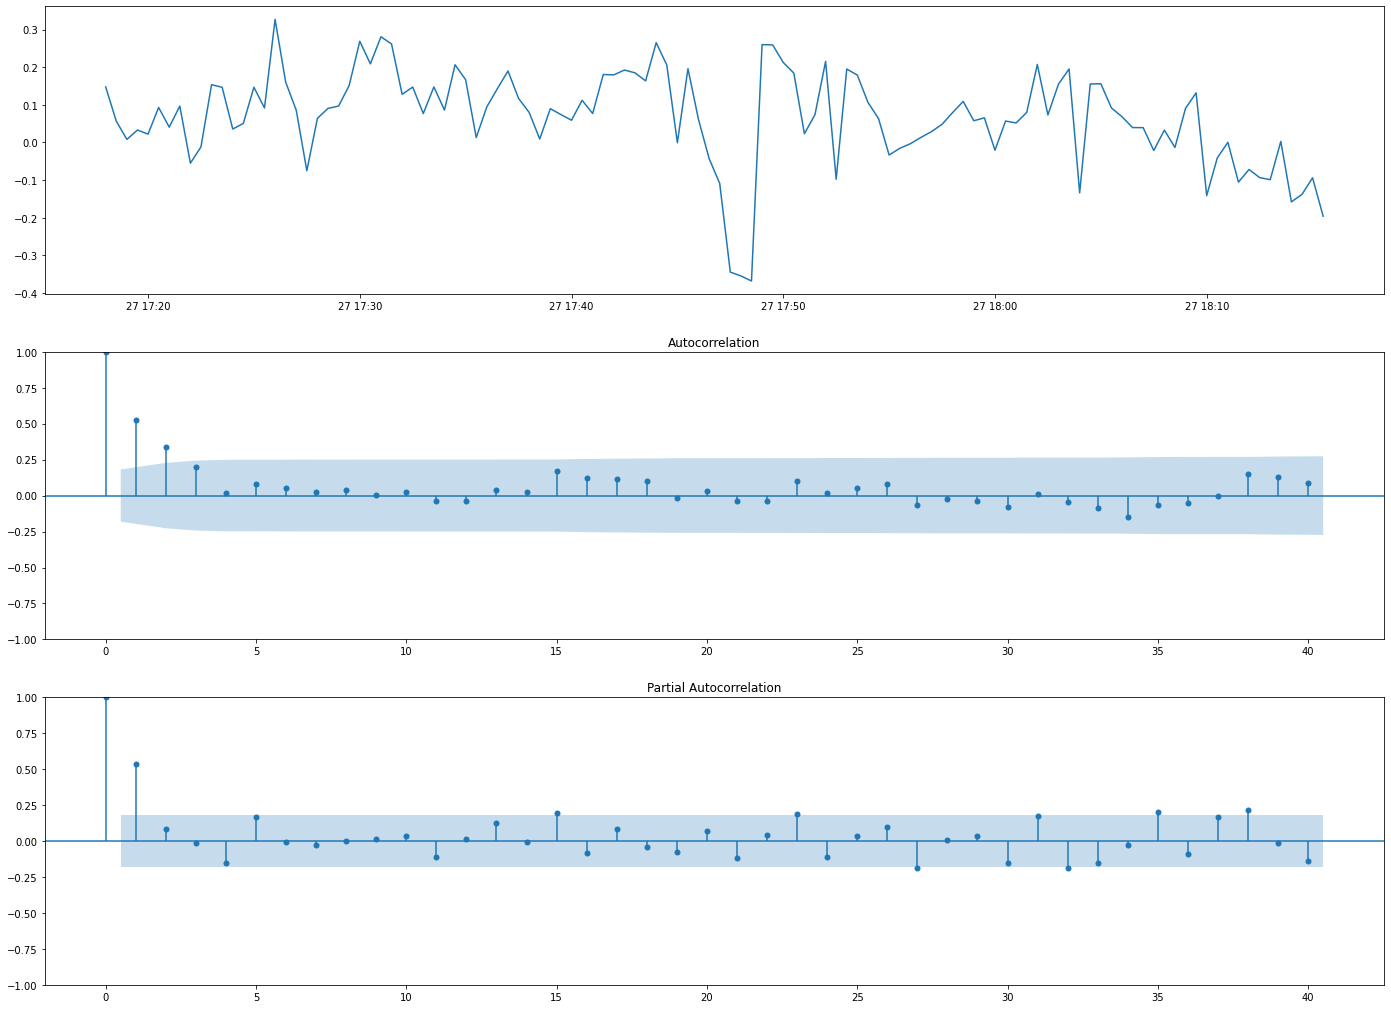

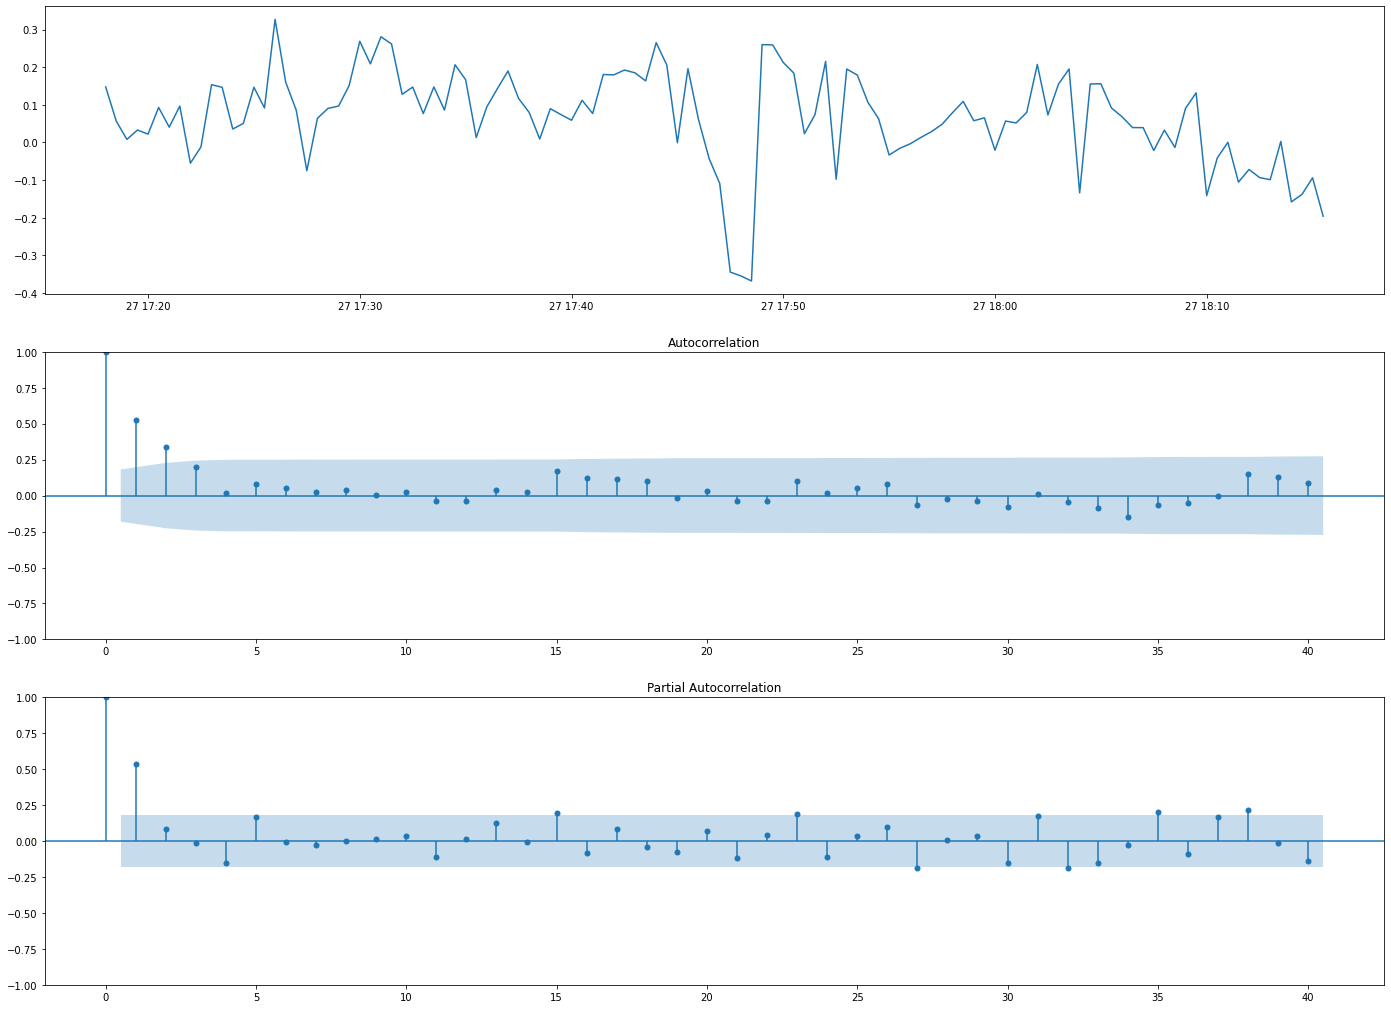

In [278]:
f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(24,18)) 
ax1.plot(ts_vader)
sm.graphics.tsa.plot_acf(ts_vader, lags=40, ax = ax2)
sm.graphics.tsa.plot_pacf(ts_vader, lags=40, ax = ax3)